In [50]:
import pandas
import numpy
from n2lite import n2lite
import matplotlib.pyplot as plt
import matplotlib
import pickle
%matplotlib inline

In [51]:
# beamの指定　
figsize = (2*3, 2*3)
power1 = '3l'
power2 = '2r'
XFFTS = '5l'

In [52]:
path_HOT = '/home/amigos/data/sql/loatt_sweep/20181111_124408/param.db'
path_COLD = '/home/amigos/data/sql/loatt_sweep/20181111_123413/param.db'
path_roach_HOT = '/home/amigos/data/sql/loatt_sweep/20181111_114220/roach2.db'
path_roach_COLD = '/home/amigos/data/sql/loatt_sweep/20181111_113228/roach2.db'

In [53]:
# データの呼び出し
D_HOT = n2lite.N2lite(path_HOT)
D_COLD = n2lite.N2lite(path_COLD)
roach_HOT = n2lite.N2lite(path_roach_HOT)
roach_COLD = n2lite.N2lite(path_roach_COLD)
d_HOT = D_HOT.read_pandas_all()
d_COLD = D_COLD.read_pandas_all()
R_HOT = roach_HOT.read_pandas_all()
R_COLD = roach_COLD.read_pandas_all()

In [54]:
#　ROACH 以外のデータ処理　

d2_HOT_groupby = d_HOT.groupby('loatt_5l')
d2_COLD_groupby = d_COLD.groupby('loatt_5l')
loatt_HOT_mean =d2_HOT_groupby.mean()
loatt_HOT_mean['time'] = loatt_HOT_mean['time'] - loatt_HOT_mean['time'][0]
loatt_COLD_mean =d2_COLD_groupby.mean()
loatt_COLD_mean['time'] = loatt_COLD_mean['time'] - loatt_COLD_mean['time'][0]

In [ ]:
# ROACH のデータ処理　
_datatime = R_HOT['time5_1']
datatime = _datatime-_datatime[0]

_power1_HOT = R_HOT['data3_1']
power1_HOT = [pickle.loads(_) for _ in _power1_HOT]
_Power1_HOT = [sum(power1_HOT[i]) for i in range(len(power1_HOT))]
Power1_HOT = pandas.DataFrame(_Power1_HOT)
_power1_COLD = R_COLD['data3_1']
power1_COLD = [pickle.loads(_) for _ in _power1_COLD]
_Power1_COLD = [sum(power1_COLD[i]) for i in range(len(power1_COLD))]
Power1_COLD = pandas.DataFrame(_Power1_COLD)

_power2_HOT = R_HOT['data3_2']
power2_HOT = [pickle.loads(_) for _ in _power2_HOT]
_Power2_HOT = [sum(power2_HOT[i]) for i in range(len(power2_HOT))]
Power2_HOT = pandas.DataFrame(_Power2_HOT)
_power2_COLD = R_COLD['data3_2']
power2_COLD = [pickle.loads(_) for _ in _power2_COLD]
_Power2_COLD = [sum(power2_COLD[i]) for i in range(len(power2_COLD))]
Power2_COLD = pandas.DataFrame(_Power2_COLD)

_power3_HOT = R_HOT['data4_1']
power3_HOT = [pickle.loads(_) for _ in _power3_HOT]
_Power3_HOT = [sum(power3_HOT[i]) for i in range(len(power3_HOT))]
Power3_HOT = pandas.DataFrame(_Power3_HOT)
_power3_COLD = R_COLD['data4_1']
power3_COLD = [pickle.loads(_) for _ in _power3_COLD]
_Power3_COLD = [sum(power3_COLD[i]) for i in range(len(power3_COLD))]
Power3_COLD = pandas.DataFrame(_Power3_COLD)

_power4_HOT = R_HOT['data5_1']
power4_HOT = [pickle.loads(_) for _ in _power4_HOT]
_Power4_HOT = [sum(power4_HOT[i]) for i in range(len(power4_HOT))]
Power4_HOT = pandas.DataFrame(_Power4_HOT)
_power4_COLD = R_COLD['data5_1']
power4_COLD = [pickle.loads(_) for _ in _power4_COLD]
_Power4_COLD = [sum(power4_COLD[i]) for i in range(len(power4_COLD))]
Power4_COLD = pandas.DataFrame(_Power4_COLD)

In [ ]:
power_HOT = pandas.concat([datatime,Power1_HOT,Power2_HOT,Power3_HOT,Power4_HOT],axis =1)
power_HOT.columns = ['time','Power1_HOT','Power2_HOT','Power3_HOT','Power4_HOT']
power_COLD = pandas.concat([datatime,Power1_COLD,Power2_COLD,Power3_COLD,Power4_COLD],axis = 1)
power_COLD.columns = ['time','Power1_COLD','Power2_COLD','Power3_COLD','Power4_COLD']

In [ ]:
def sort_roach_HOT(x):
    for i in range(len(loatt_HOT_mean.index)-1):
        if x > loatt_HOT_mean['time'][loatt_HOT_mean.index[i]] and x < loatt_HOT_mean['time'][loatt_HOT_mean.index[i+1]]:return i*0.1
        elif x > loatt_HOT_mean['time'][loatt_HOT_mean.index[100]]:return 10.0
        continue
        
def sort_roach_COLD(x):
    for i in range(len(loatt_COLD_mean.index)-1):
        if x > loatt_COLD_mean['time'][loatt_COLD_mean.index[i]] and x < loatt_COLD_mean['time'][loatt_COLD_mean.index[i+1]]:return i*0.1
        elif x > loatt_COLD_mean['time'][loatt_COLD_mean.index[100]]:return 10.0
        continue

In [ ]:
power_HOT['loatt'] = power_HOT['time'].apply(sort_roach_HOT)
power_COLD['loatt'] = power_COLD['time'].apply(sort_roach_COLD)

In [ ]:
power_HOT_groupby = power_HOT.groupby('loatt')
power_HOT_groupby

In [ ]:
power_HOT_groupby = power_HOT.groupby('loatt')
power_HOT_mean =power_HOT_groupby.mean()
power_COLD_groupby = power_COLD.groupby('loatt')
power_COLD_mean =power_COLD_groupby.mean()

In [ ]:
# ROACH_data_plot

power_HOT_mean['Y_factor'] = power_HOT_mean['Power4_HOT']/power_COLD_mean['Power4_COLD']
Y_R = power_HOT_mean['Y_factor']
Trx = (300-Y_R*77)/(Y_R-1)
plt.plot(Trx)
plt.ylabel('Trx')
#plt.ylim(0,200)

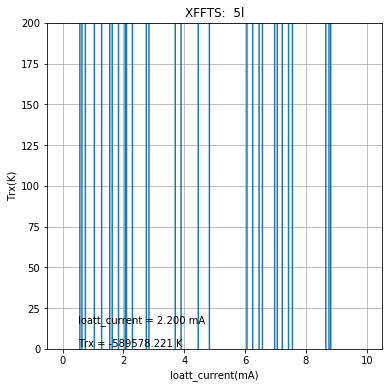

In [55]:
# XFFTS_data_plot
loatt_HOT_mean['Yfactor'] = loatt_HOT_mean['xffts_1']/loatt_COLD_mean['xffts_1']
Y_X =loatt_HOT_mean['Yfactor']
Trx = (300-Y_X*77)/(Y_X-1)

figsize = (2*3, 2*3)
fig = plt.figure(figsize=figsize)

plt.plot(Trx,label = 'Trx')
plt.text(0.5,2,'loatt_current = {0:.3f} mA\n\nTrx = {1:.3f} K'.format(Trx.idxmin(), min(Trx)))
plt.ylabel('Trx(K)')
plt.xlabel('loatt_current(mA)')
plt.ylim(0,200)
plt.grid()
plt.title('XFFTS:  ' +XFFTS)

In [56]:
#power_meter_data_plot
loatt_HOT_mean['Yfactor_p1'] = loatt_HOT_mean['power_1']-loatt_COLD_mean['power_1']
loatt_HOT_mean['Yfactor_p2'] = loatt_HOT_mean['power_2']-loatt_COLD_mean['power_2']
Yfactor_p1 = loatt_HOT_mean['Yfactor_p1']
Yfactor_p2 = loatt_HOT_mean['Yfactor_p2']
Y_p1 = 10 ** (Yfactor_p1/10)
Y_p2 = 10 ** (Yfactor_p2/10)
Trx_p1 = (300-Y_p1*77)/(Y_p1-1)
Trx_p2 = (300-Y_p2*77)/(Y_p2-1)
_Trx = pandas.concat([Trx_p1,Trx_p2],axis =1)
_Trx.columns = ['Trx_p1','Trx_p2']
loatt_HOT_mean = pandas.concat([loatt_HOT_mean,_Trx],axis =1)

t1= loatt_HOT_mean.loc[loatt_HOT_mean['Trx_p1'].idxmin()]
t2= loatt_HOT_mean.loc[loatt_HOT_mean['Trx_p2'].idxmin()]

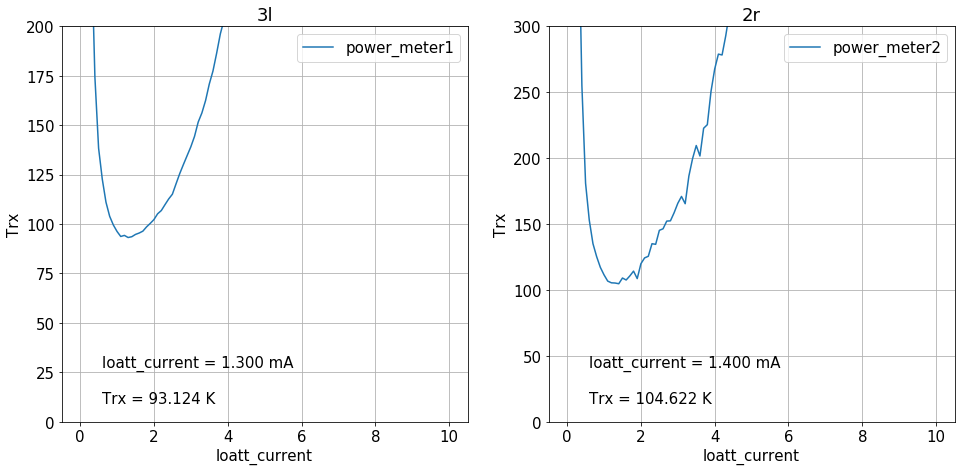

In [57]:
ncol = 2
nrow = 2
nax = ncol * nrow
matplotlib.rcParams['font.size'] = 15
figsize = (ncol*8, nrow*8)
fig = plt.figure(figsize=figsize)
                               
ax1 = fig.add_subplot(2,2,1)
ax1.plot(Trx_p1,label = 'power_meter1')
ax1.text(0.1,0.05,'loatt_current = {0:.3f} mA\n\nTrx = {1:.3f} K'.format(loatt_HOT_mean['Trx_p1'].idxmin(), t1['Trx_p1']),transform=ax1.transAxes)
ax1.set_xlabel('loatt_current')
ax1.set_ylabel('Trx')
ax1.set_ylim(0,200)
ax1.set_title(power1)
ax1.grid()
ax2 = fig.add_subplot(2,2,2)
ax2.text(0.1,0.05,'loatt_current = {0:.3f} mA\n\nTrx = {1:.3f} K'.format(loatt_HOT_mean['Trx_p2'].idxmin(), t2['Trx_p2']),transform=ax2.transAxes)
ax2.set_xlabel('loatt_current')
ax2.set_ylabel('Trx')
ax2.plot(Trx_p2,label = 'power_meter2')
ax2.set_ylim(0,300)
ax2.set_title(power2)
ax2.grid()
ax1.legend(loc = 1)
ax2.legend(loc = 1)

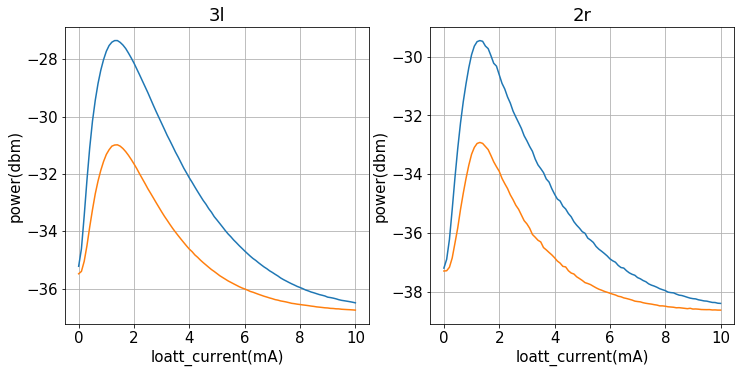

In [67]:
ncol = 2
nrow = 2
nax = ncol * nrow
matplotlib.rcParams['font.size'] = 15
figsize = (ncol*6, nrow*6)
fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(2,2,1)
ax1.plot(loatt_HOT_mean['power_1'])
ax1.plot(loatt_COLD_mean['power_1'])
ax1.set_xlabel('loatt_current(mA)')
ax1.set_ylabel('power(dbm)')
ax1.set_title(power1)
ax1.grid()
ax2 = fig.add_subplot(2,2,2)
ax2.plot(loatt_HOT_mean['power_2'])
ax2.plot(loatt_COLD_mean['power_2'])
ax2.set_xlabel('loatt_current(mA)')
ax2.set_ylabel('power(dbm)')
ax2.set_title(power2)
ax2.grid()

In [171]:
t1= loatt_HOT_mean.loc[loatt_HOT_mean['Trx_p1'].idxmin()]
print('最適パラメータ:','   power_meter1')
print('Trx    :',t1['Trx_p1'],'(K)')
print('loatt  :',loatt_HOT_mean['Trx_p1'].idxmin(),'(mA)')
print('sis_cur:',t1['sis_cur_'+power1],'(mA)')
print('sis_vol:',t1['sis_vol_'+power1],'(mV)')

最適パラメータ:    power_meter1
Trx    : -26181600.07419912 (K)
loatt  : 2.2 (mA)
sis_cur: -15.286532315340908 (mA)
sis_vol: -0.08711381392045454 (mV)


In [172]:
t2= loatt_HOT_mean.loc[loatt_HOT_mean['Trx_p2'].idxmin()]
print('最適パラメータ:','   power_meter2')
print('Trx    :',t2['Trx_p2'],'(K)')
print('loatt  :',loatt_HOT_mean['Trx_p2'].idxmin(),'(mA)')
print('sis_cur:',t2['sis_cur_'+power2],'(mA)')
print('sis_vol:',t2['sis_vol_'+power2],'(mV)')

最適パラメータ:    power_meter2
Trx    : 68.5738031996111 (K)
loatt  : 1.25 (mA)
sis_cur: 74.73618236940298 (mA)
sis_vol: 7.823431669776119 (mV)


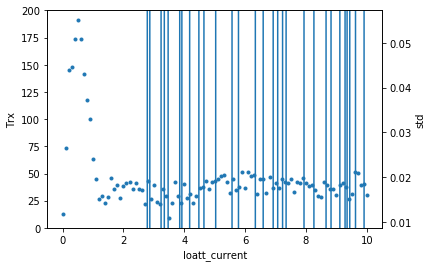

In [204]:
#power_meter1の分散
plt.figure(dpi=600)
fig, ax1 = plt.subplots()
std = d2_HOT_groupby.std()['power_1']
ax1.plot(Trx_p1)
ax1.set_ylim(0,200)
ax1.set_ylabel('Trx')
ax2 = ax1.twinx()
ax2.plot(std,'.')
ax2.set_ylabel('std')
ax1.set_xlabel('loatt_current')

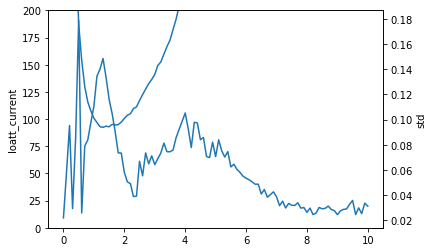

In [206]:
#power_meter2の分散
fig, ax1 = plt.subplots()
std2 = d2_HOT_groupby.std()['power_2']
ax1.plot(Trx_p2)
ax1.set_ylim(0,200)
ax1.set_ylabel('Trx')
ax2 = ax1.twinx()
ax2.plot(std2)
ax2.set_ylabel('std')
ax1.set_ylabel('loatt_current')

In [10]:
#外れ値を取り除く
def outlier_2s_power1():

    #for i in range(len(loatt_HOT_mean.index)):

       # 列を抽出する
    col = d2_HOT_groupby.get_group(loatt_HOT_mean.index[1])['power_1']
       
        # 平均と標準偏差
    average = numpy.mean(col)
    sd = numpy.std(col)

        # 外れ値の基準点
    outlier_min = average - (sd) * 2
    outlier_max = average + (sd) * 2

        # 範囲から外れている値を除く
    col[col < outlier_min] = None
    col[col > outlier_max] = None

    return d2_HOT_groupby

def outlier_2s_power2():

    for i in range(len(loatt_HOT_mean.index)):

        # 列を抽出する
        col = d2_HOT_groupby.get_group(loatt_HOT_mean.index[i])['power_2']

        # 平均と標準偏差
        average = numpy.mean(col)
        sd = numpy.std(col)

        # 外れ値の基準点
        outlier_min = average - (sd) * 2
        outlier_max = average + (sd) * 2

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return d2_HOT_groupby

In [11]:
outlier_2s_power1()

/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
d2_HOT_groupby.get_group(loatt_HOT_mean.index[1])['power_1']

139   -27.304688
140   -27.304688
141   -27.304688
142   -27.304688
143   -27.304688
144   -27.246094
145   -27.333984
146   -27.333984
147   -27.333984
148   -27.333984
149   -27.304688
150   -27.333984
151   -27.333984
152   -27.304688
153   -27.246094
154   -27.246094
155   -27.275391
156   -27.216797
157   -27.216797
158   -27.275391
159   -27.275391
160   -27.275391
161   -27.275391
162   -27.246094
163   -27.275391
164   -27.275391
165   -27.246094
166   -27.246094
167   -27.246094
168   -27.246094
         ...    
279   -27.275391
280   -27.304688
281   -27.304688
282   -27.246094
283   -27.275391
284   -27.275391
285   -27.246094
286   -27.304688
287   -27.275391
288   -27.275391
289   -27.275391
290   -27.275391
291   -27.275391
292   -27.275391
293   -27.275391
294   -27.275391
295   -27.275391
296   -27.275391
297   -27.275391
298   -27.275391
299   -27.275391
300   -27.275391
301   -27.275391
302   -27.304688
303   -27.304688
304   -27.275391
305   -27.246094
306   -27.2753